### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [7]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [8]:
print(df['Owner'].unique())

[0 1 3]


In [9]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [10]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
data =df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [13]:
data.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [14]:
data['Current_Year']= datetime.now().year

In [15]:
data.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021


In [16]:
data['no_year']=data['Current_Year']-data['Year']

In [17]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [18]:
data.drop(['Year','Current_Year'],axis=1,inplace=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Converting categorical features into numerical values

In [19]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [20]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


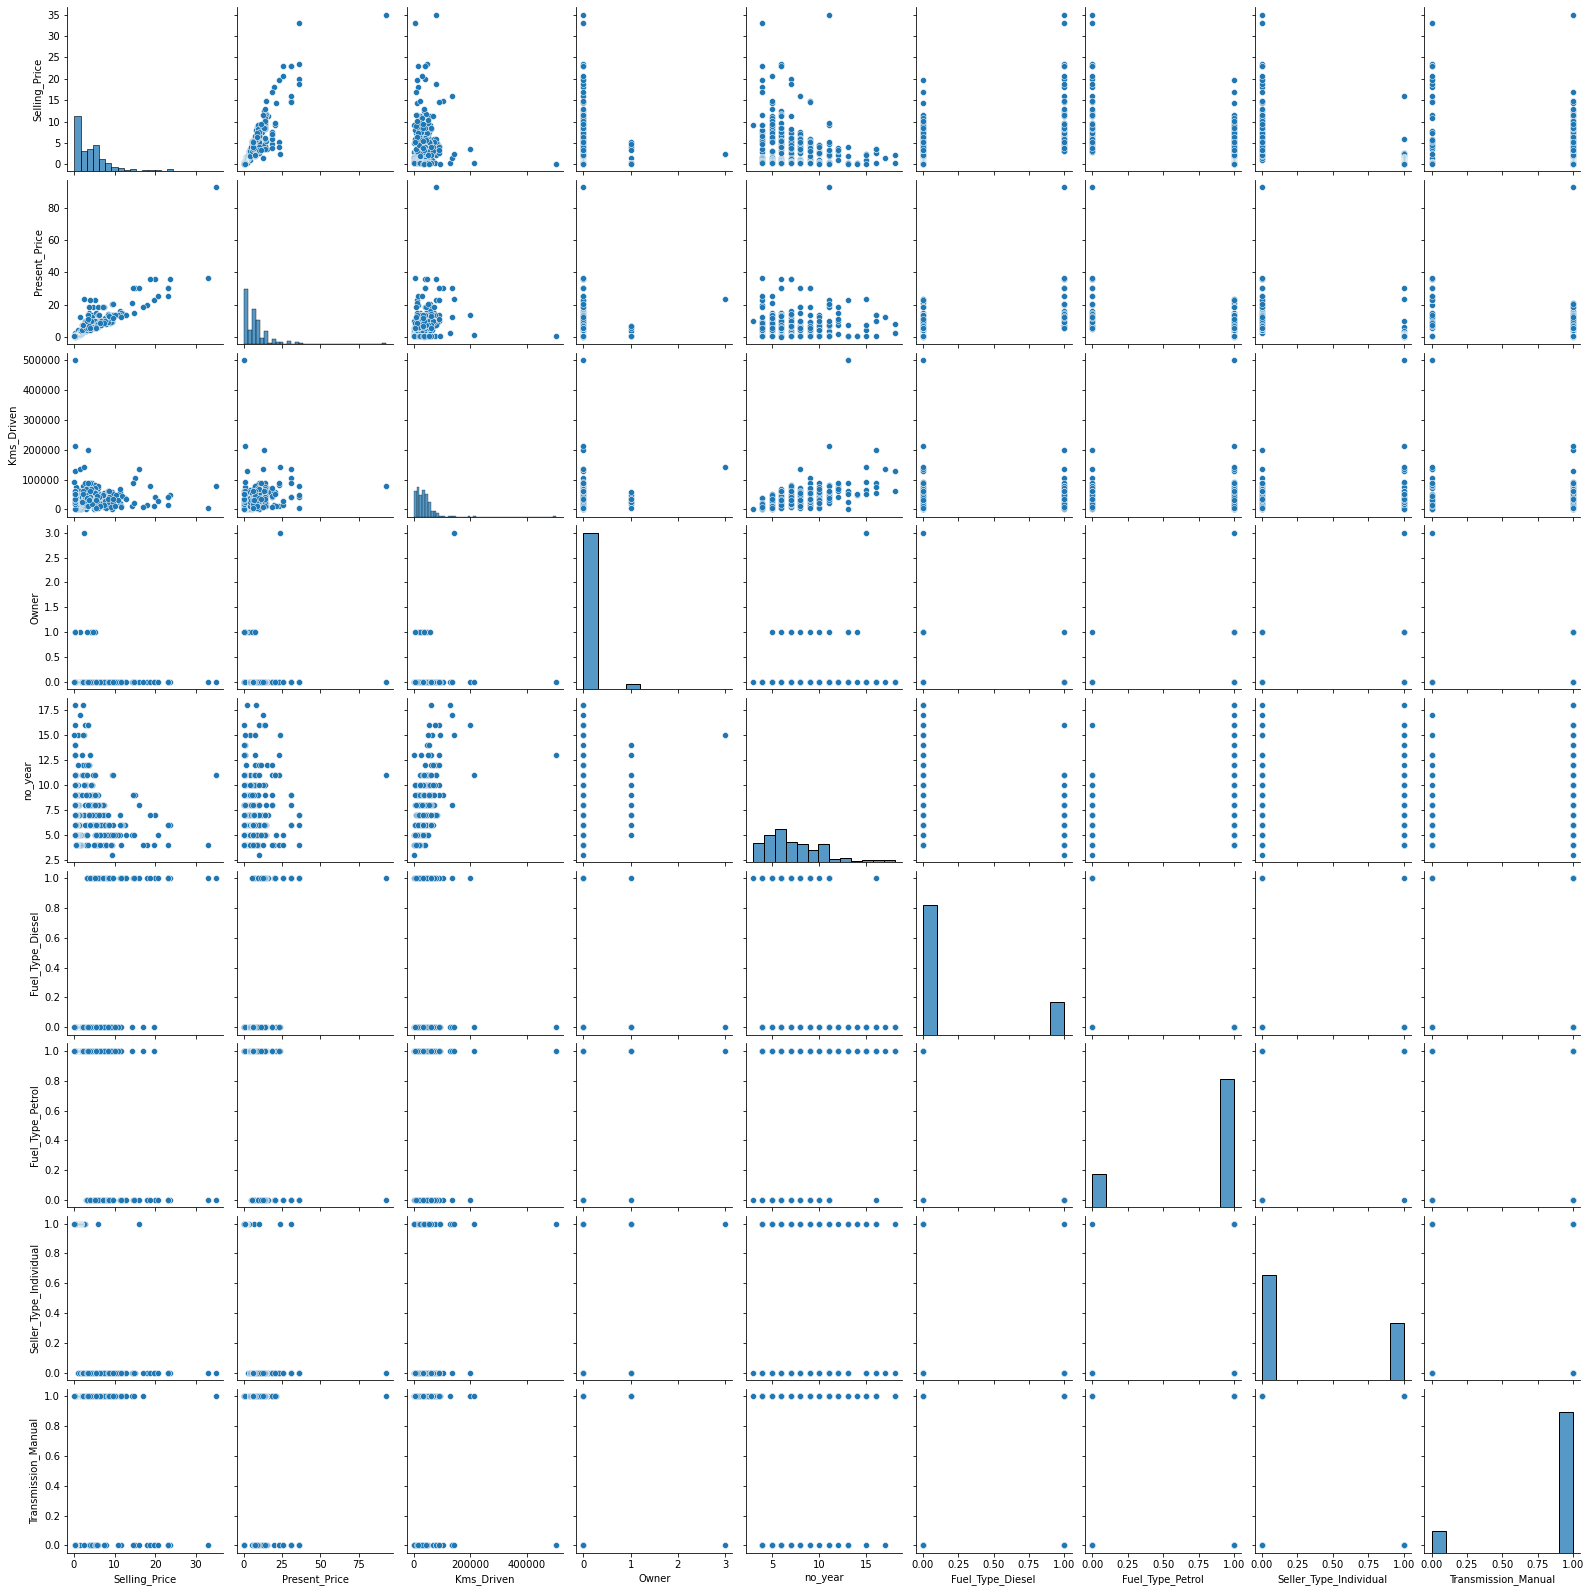

In [21]:
sns.pairplot(data)

<AxesSubplot:>

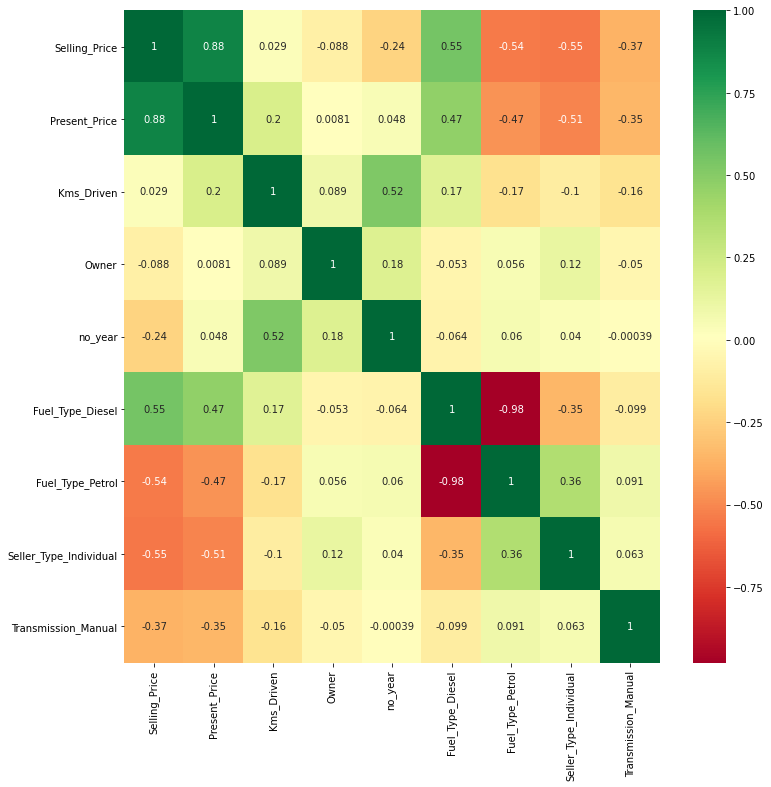

In [22]:
corrmat = data.corr()
top_corr = corrmat.index
plt.figure(figsize=(12,12))
sns.heatmap(data[top_corr].corr(),annot=True, cmap = 'RdYlGn')

### Separating dependent and independent features

In [23]:
X = data.drop(['Selling_Price'],axis=1)
y = data.Selling_Price

In [24]:
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.3942804  0.04009292 0.0005289  0.07784067 0.22934762 0.00782662
 0.11591721 0.13416566]


<AxesSubplot:>

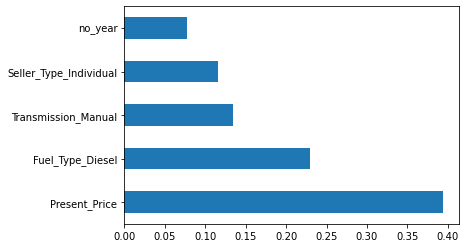

In [26]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train.shape

(240, 8)

In [29]:
rf_random = RandomForestRegressor(random_state=42)

In [30]:
rf_random.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [31]:
pred_1 = rf_random.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test,pred_1)
print(mae)

0.635359016393443


In [33]:
mse = mean_squared_error(y_test,pred_1)
print(mse)

0.9009241001639343


In [34]:
rmse = np.sqrt(mse)
print(rmse)

0.949170216643956


### Hyperparameter tuning the base model

In [35]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(5,30,num=6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [36]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_leaf':min_samples_leaf,
              'min_samples_split':min_samples_split}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10, 15, 100]}


In [37]:
rf = RandomForestRegressor(random_state=42)
rf_rand = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error'
                             ,n_iter=10,cv=5,verbose=2,n_jobs=-1)

In [38]:
rf_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [39]:
predictions = rf_rand.predict(X_test)

In [40]:
mse = mean_squared_error(y_test,predictions)
print(mse)

0.8854027125614792


In [41]:
rmse=np.sqrt(mse)
print(rmse)

0.9409584010791758


In [42]:
mae = mean_absolute_error(y_test, predictions)

In [43]:
print(mae)

0.6264877049180322


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

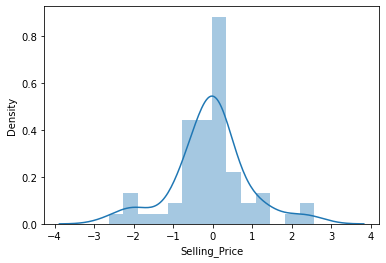

In [44]:
sns.distplot(y_test-predictions)

In [45]:
rf_rand.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [46]:
rf_new_model = RandomForestRegressor(n_estimators=60,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     max_features='auto',
                                     max_depth=15,
                                     random_state=42,
                                     n_jobs=-1)

In [47]:
rf_new_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=60, n_jobs=-1, random_state=42)

In [48]:
pred_new = rf_new_model.predict(X_test)

In [49]:
mean_absolute_error(y_test, pred_new)

0.6286420765027326

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

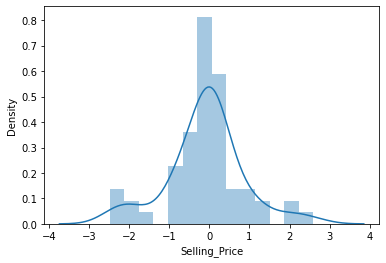

In [50]:
sns.distplot(y_test-pred_1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

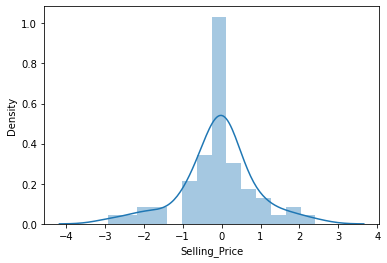

In [51]:
sns.distplot(y_test-pred_new)

In [52]:
file = open('Random_forest_regressor_model.pkl','wb')

pickle.dump(rf_new_model,file)